# Proposta

A distribuidora de vinhos **JackWine** decidiu expandir seus horizontes e agora está importando vinhos tintos e branco portugueses, mais especificamente a marca "Vinho Verde", que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

* link do dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

#### Objetivos principais das análises:

1. Distribuição das co-variáveis por qualidade do vinho?

2. Relação entre as co-variáveis e teor alcóolico?

3. Qual a acidez volátil média dos vinhos de qualidade elevada?

4. Qual a relação entre teor alcóolico e qualidade do vinho?

5. Há alguma relação entre acidez volátil e teor alcóolico?
    
6. Há alguma relação entre acidez volátil e qualidade do vinho?

In [1]:
import sys # Fornece acesso a variáveis e funções do sistema Python
import os # fornece interface com o sitema operacional
import pandas as pd

# Caminho absoluto para a pasta do projeto (nível acima de 'src')
project_root = os.path.abspath("..")

if project_root not in sys.path:
    sys.path.append(project_root)

# Importa Classes de objetos
from src.etl.extract import extract_csv_processed
from src.etl.transform import remove_outliers
from src.etl.stats import calcula_skew_kurtosis, obter_dados_nulos, detecta_outliers_iqr, matrix_correlacao, analisar_distribuicao
from src.visualization.graficos import grafo_barra, grafo_heatmap, grafo_scatterplot, grafo_boxplot, grafo_distribuicao, grafo_bloco_boxplot, grafo_dist_boxplot

In [2]:
# Extrai dados processados
input_path = 'arquivos_exploratorio.csv'

df = extract_csv_processed(input_path)
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Análise Exploratória (EDA)

In [3]:
# Shape
df.shape

(1599, 12)

In [4]:
#informação do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloretos               1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   ph                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Dados Nulos
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloretos                 0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
ph                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

In [7]:
# Estatística Básica do Dataframe
df.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Observando as estatísticas básicas de cada variável, percebemos um baixa dispersão nos dados devido ao seu desvio padrão baixo, se destacando entre eles o dioxido de carbono livre e total com um desvio padrão mais alto assim tendo um dispersão maior, podendo causar assim uma alta variabilidade fazendo a com que o dioxido de enxofre fique bem maior ou menor que a média.
#### Isso pode impactar na qualidade do vinho, sendo assim ao trabalhar com os modelos irei padronizar os valores dos dados para que naõ tenhamos multicolinearidade em nossas predições.

In [15]:
# Obseva dados duplicados
df[df.duplicated()].sort_values('qualidade')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,6.8,0.360,0.32,1.80,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7
1468,7.3,0.480,0.32,2.10,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7
1029,7.7,0.580,0.01,1.80,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7
1450,7.2,0.370,0.32,2.00,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,7


#### Os dados duplicados existentes no DataFrame são comuns, pois para se obter resultados de qualidade do vinho esses resultadoos precisarão ter seu indicadores de qualidade com os mesmos resultados.

# Gráfico de análises


📊 Análise da coluna: acidez_fixa


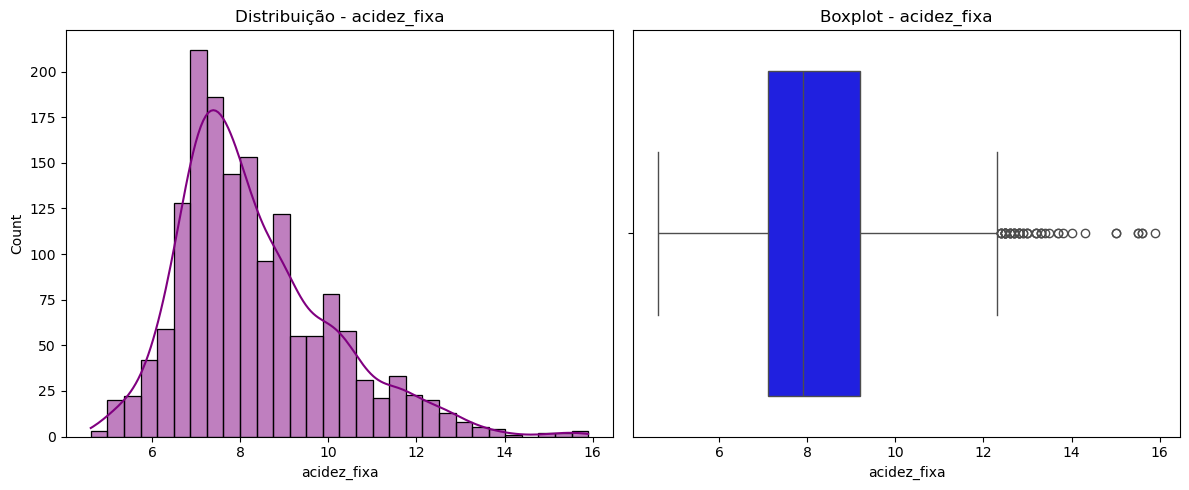


📊 Análise da coluna: acidez_volatil


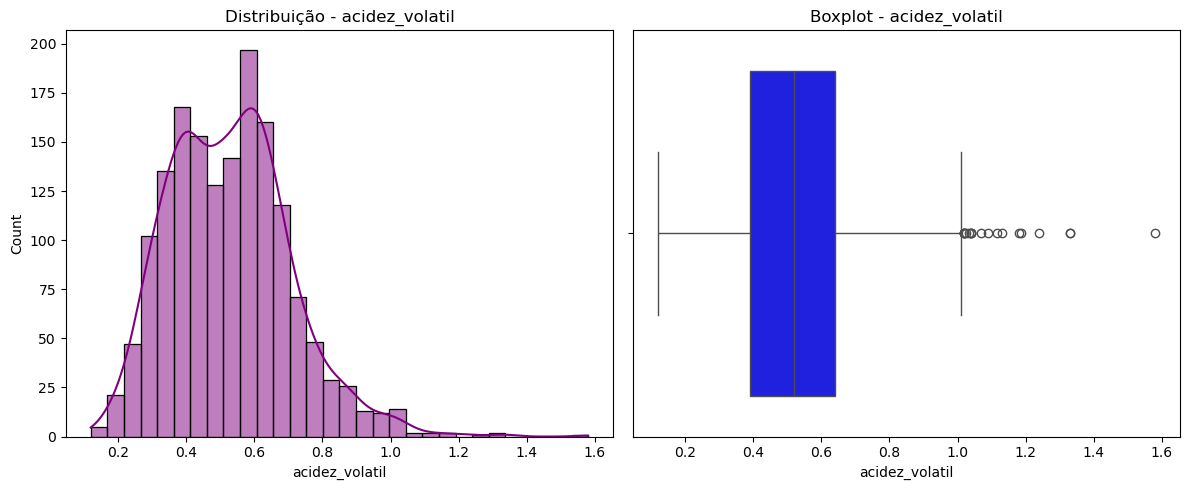


📊 Análise da coluna: acido_citrico


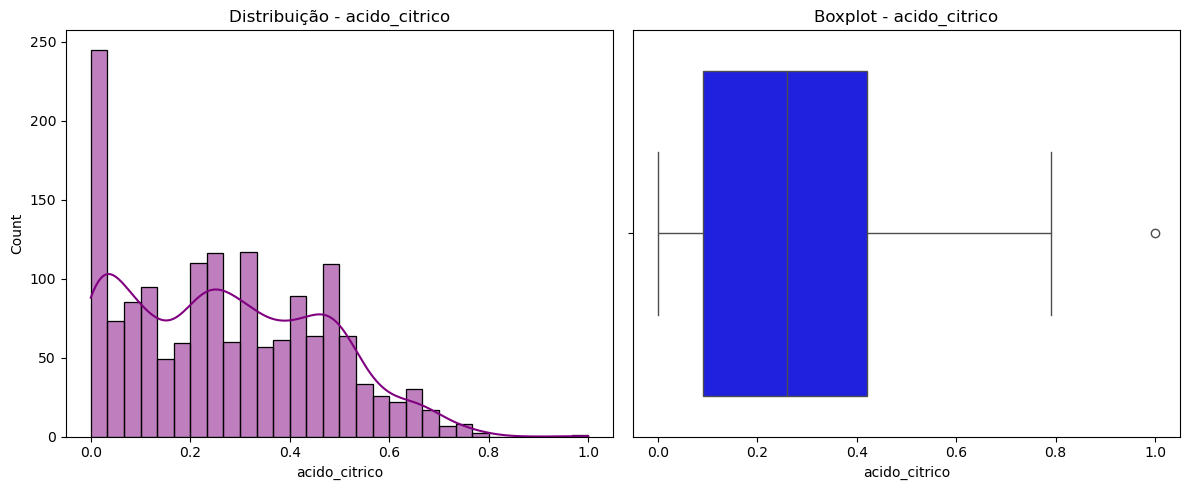


📊 Análise da coluna: acucar_residual


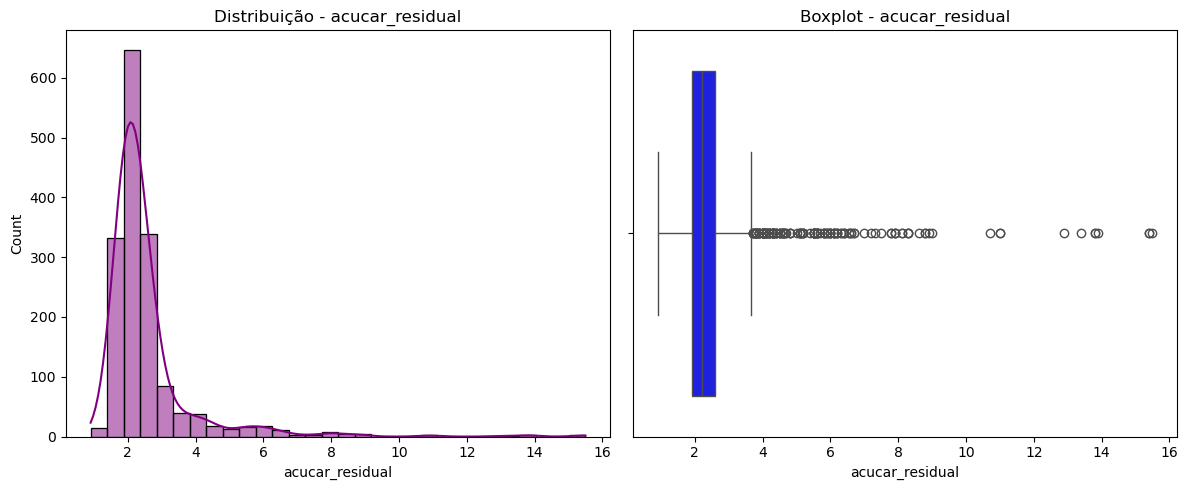


📊 Análise da coluna: cloretos


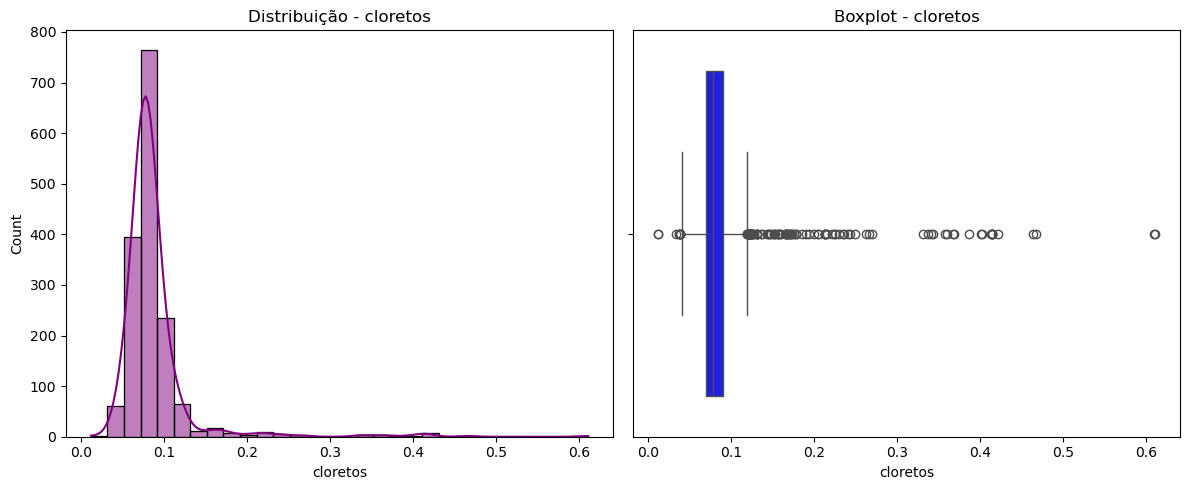


📊 Análise da coluna: dioxido_enxofre_livre


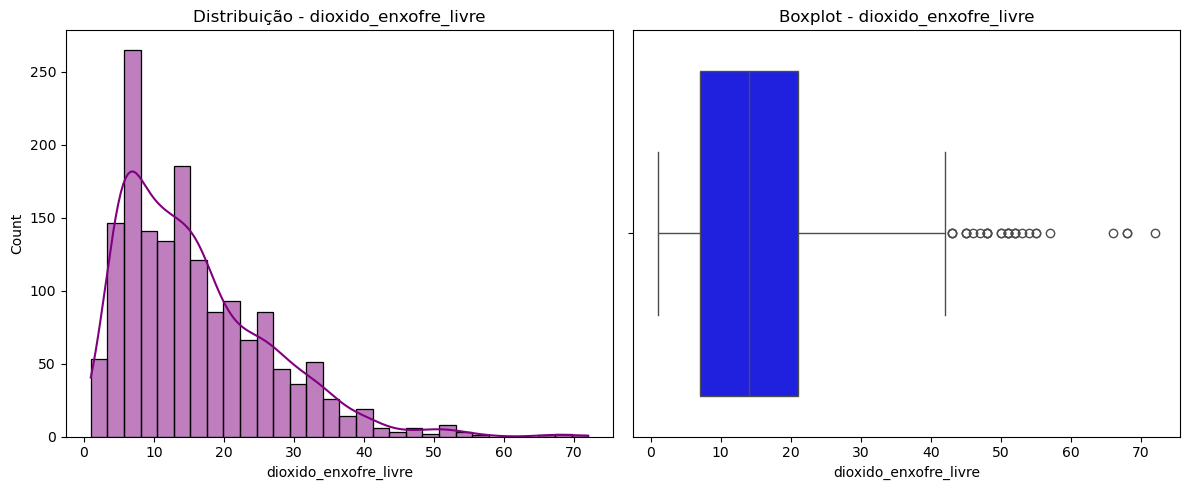


📊 Análise da coluna: dioxido_enxofre_total


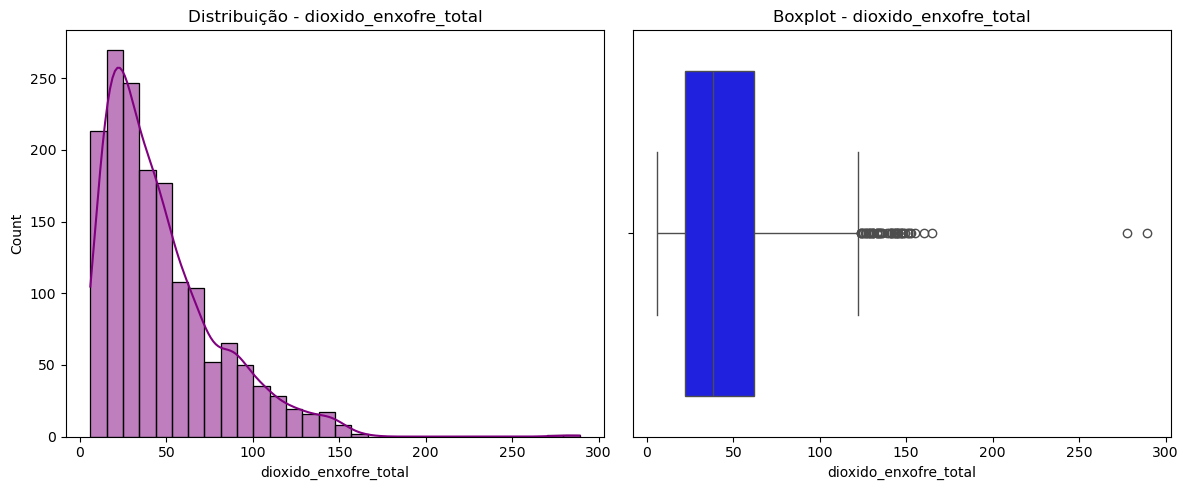


📊 Análise da coluna: densidade


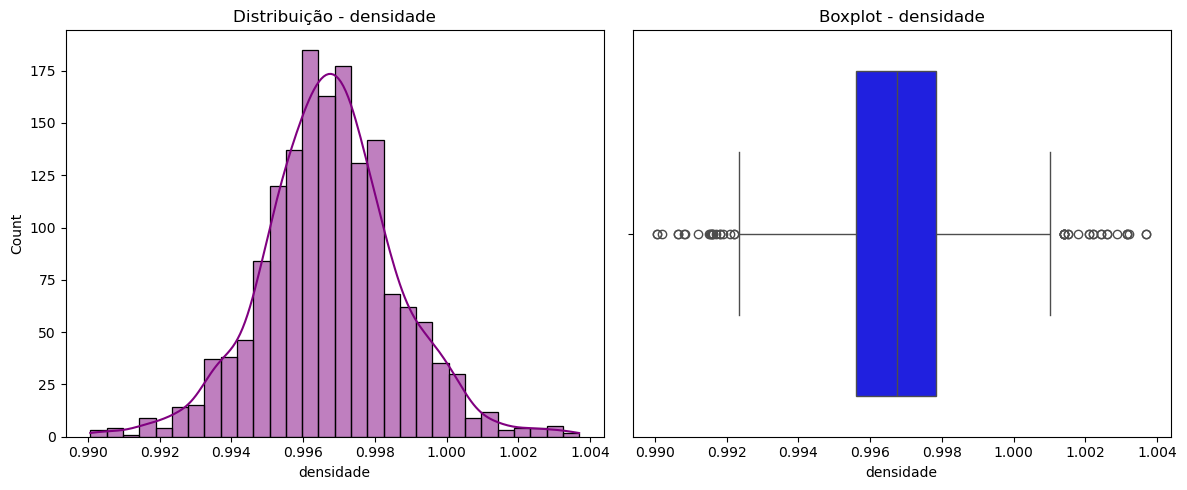


📊 Análise da coluna: ph


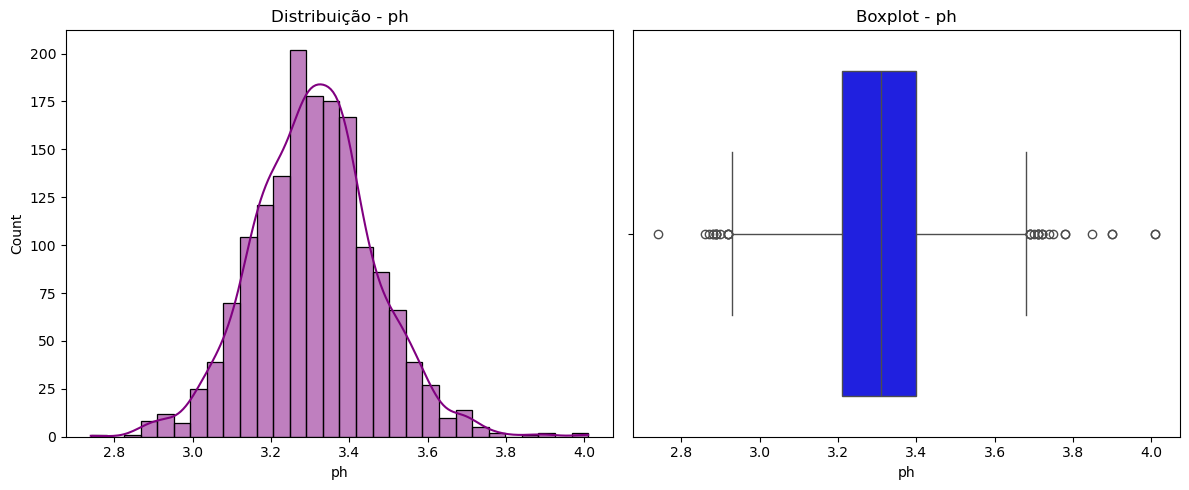


📊 Análise da coluna: sulfatos


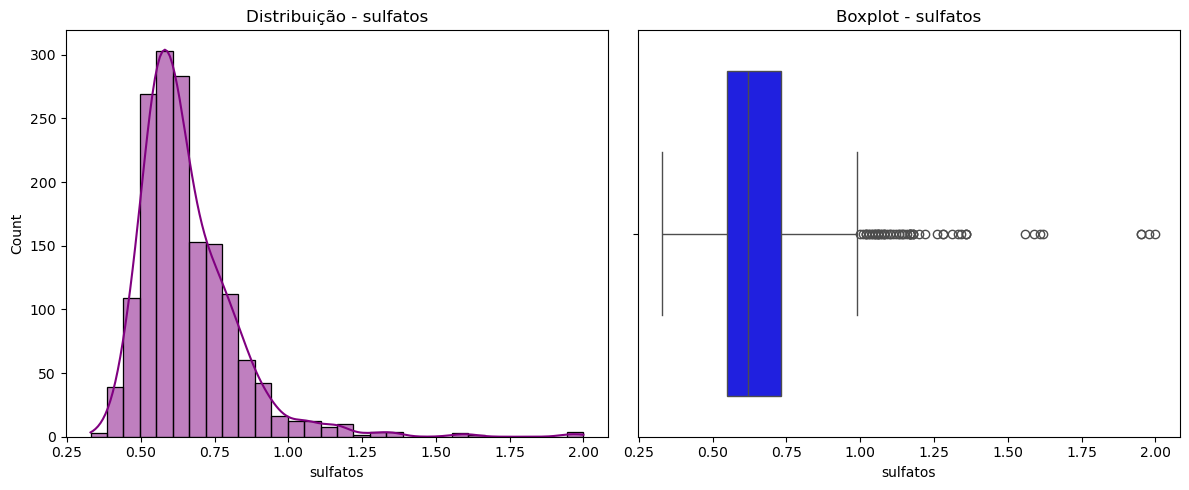


📊 Análise da coluna: alcool


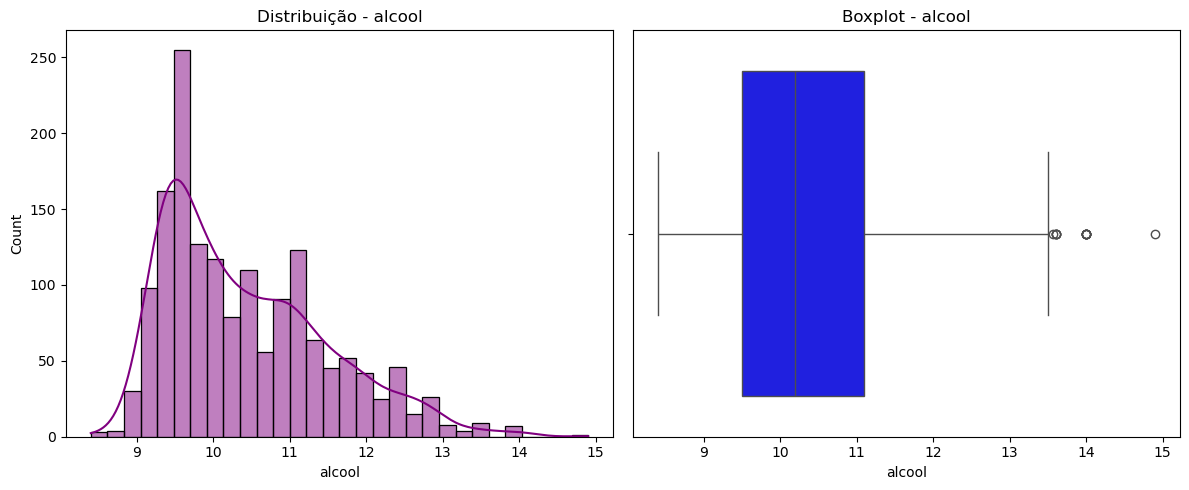


📊 Análise da coluna: qualidade


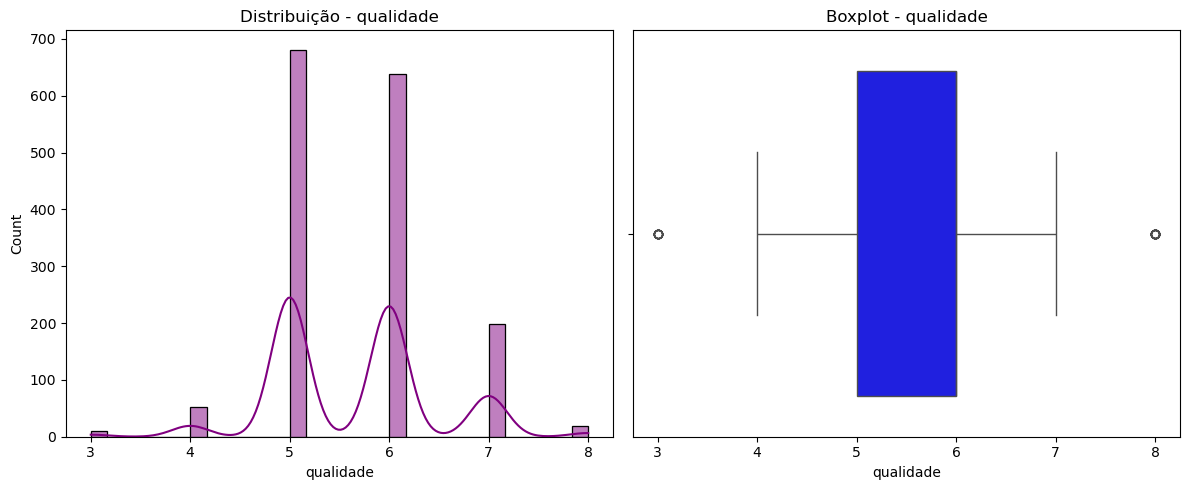

In [3]:
# Gráfico de distribuição e boxplot
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfatos', 'alcool', 'qualidade']
grafo_dist_boxplot(df, colunas)

#### Detecta Outlier do DataSet

In [ ]:
detecta_outliers_iqr(df, colunas)


📌 Analisando a coluna: ACIDEZ_FIXA
🔹 Outliers (Z-Score): 12
     acidez_fixa  z_score_acidez_fixa
243         15.0             3.838072
244         15.0             3.838072
347         13.8             3.148635
374         14.0             3.263541
381         13.7             3.091182
🔸 Outliers (IQR): 49
     acidez_fixa
205         12.8
206         12.8
243         15.0
244         15.0
264         12.5

📌 Analisando a coluna: ACIDEZ_VOLATIL
🔹 Outliers (Z-Score): 10
     acidez_volatil  z_score_acidez_volatil
38             1.13                3.364062
120            1.07                3.028873
126            1.33                4.481357
127            1.33                4.481357
199            1.09                3.140603
🔸 Outliers (IQR): 19
     acidez_volatil
38             1.13
94             1.02
120            1.07
126            1.33
127            1.33

📌 Analisando a coluna: ACIDO_CITRICO
🔹 Outliers (Z-Score): 1
     acido_citrico  z_score_acido_citrico
151            

In [11]:
# remove outliers
df_s_outliers = remove_outliers(df, colunas= colunas, metodo='zscore')

🔍 Outliers removidos: 148 linhas


#### Ao gerar os gráficos de distribuição e boxplot, conseguimos observar, que não ocorre uma distribuição normal nos dados e também temos outliers tanto observando o IQR quanto o zscore dentro de nosso dataset decidi por manter o outliers IQR e remover os outliers zscore que estão 3 vezes acima ou abaixo desvio padrão e só temos 148 linhas cerca de 0.9% um valor que podemos remover para deixar nosso dataset mais limpo para rodar os modelos de machine learning o restante irei aplicar padronização para não deixar os dados com uma diferença que possa prejudicar nossas previsões.

#### Confirma se ocorre distribuição normal nas variáveis independentes (ph e densidade)

In [ ]:
# Observa distribuição normal no ph
analisar_distribuicao(df, 'ph')

📊 Análise da coluna: **ph**

📈 Assimetria: 0.1935 (positiva)
📉 Curtose: 0.8007 (leptocúrtica)

🧪 Teste de Shapiro-Wilk:
   Estatística: 0.9922
   p-valor: 0.0105 → ❌ Não normal

🧪 Teste de D’Agostino-Pearson:
   Estatística: 33.6847
   p-valor: 0.0000 → ❌ Não normal


In [4]:
# Observa distribuição normal na densidade
analisar_distribuicao(df, 'densidade')

📊 Análise da coluna: **densidade**

📈 Assimetria: 0.0712 (positiva)
📉 Curtose: 0.9274 (leptocúrtica)

🧪 Teste de Shapiro-Wilk:
   Estatística: 0.9932
   p-valor: 0.0232 → ❌ Não normal

🧪 Teste de D’Agostino-Pearson:
   Estatística: 30.7077
   p-valor: 0.0000 → ❌ Não normal


#### Observa correlação entre as variávies

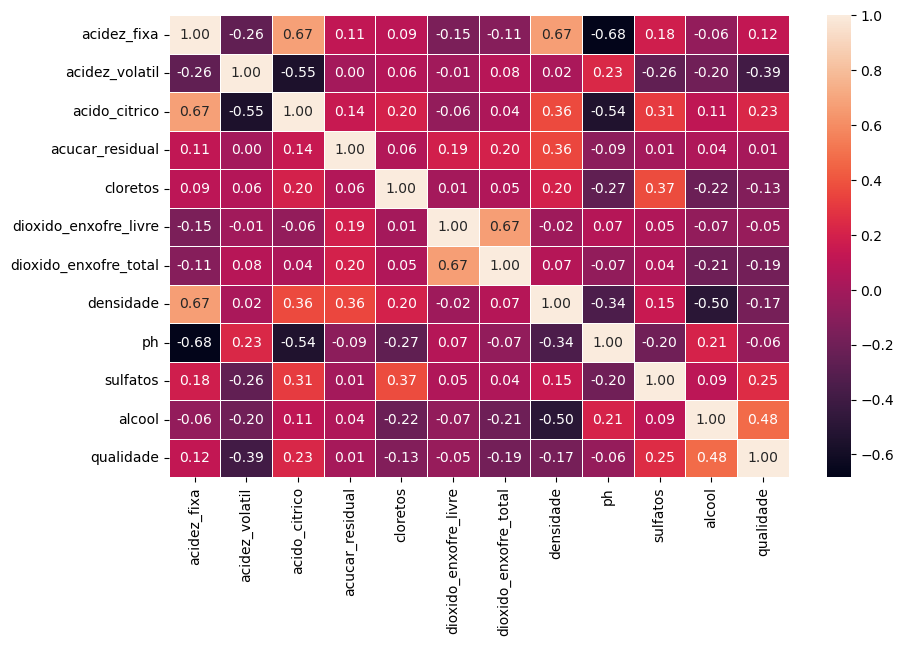

In [21]:
# Correlação das variáveis
grafo_heatmap(df)

#### Média de acidez volátil dos vinhos de qualidade elevada

In [4]:
df_filtrado = df[df['qualidade'] > 6]
df_filtrado

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [15]:
# Média de acidez volátil / qualidade
media_acidez_qualidade = pd.DataFrame(df_filtrado.groupby('qualidade')['acidez_volatil'].mean())
media_acidez_qualidade

,acidez_volatil
qualidade,
7,0.403920
8,0.423333


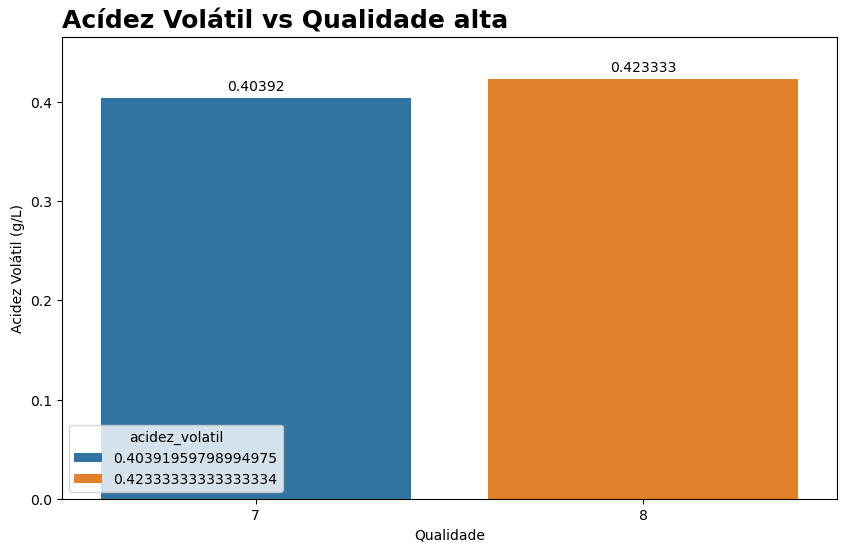

In [17]:
# Gráfico de barra Acídez Volátil / Qualidade do Vinho 0.39 de correlação
grafo_barra(media_acidez_qualidade, media_acidez_qualidade.index, media_acidez_qualidade['acidez_volatil'], media_acidez_qualidade['acidez_volatil'], titulo='Acídez Volátil vs Qualidade alta', ylabel='Acidez Volátil (g/L)', xlabel='Qualidade')

#### A média entre acidez volátil vs qualidade estão próximas nos vinhos de alta qualidade, nos mostrando que para alcançar a qualidade necessária o ideal é fica entre essas médias, mas não descartando os outros componentes de preparação do vinho.

#### relação entre teor alcóolico e qualidade do vinho

In [18]:
# Média de alcool / qualidade
media_alcool_qualidade = pd.DataFrame(df.groupby('qualidade')['alcool'].mean())
media_alcool_qualidade

,alcool
qualidade,
3,9.955000
4,10.265094
5,9.899706
6,10.629519
7,11.465913
8,12.094444


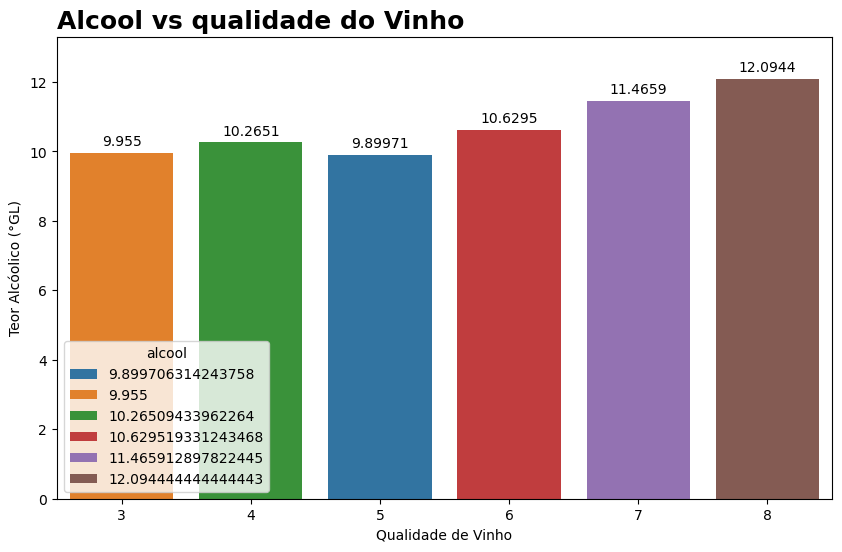

In [19]:
# Gráfico de barra alcool / Qualidade do Vinho 0.48 de correlação
grafo_barra(media_alcool_qualidade, media_alcool_qualidade.index, media_alcool_qualidade['alcool'], media_alcool_qualidade['alcool'],titulo='Alcool vs qualidade do Vinho', ylabel='Teor Alcóolico (°GL)', xlabel='Qualidade de Vinho')

#### A relação entre o teor alcóolico vs qualidade do vinho conforme o gráfico indica são diretamente proporcional, sendo que quanto maior o teor alcóolico maior a qualidade, mas observando que conforme a wikipedia relata, o teor alcóolico não pode indicar a qualidade do vinho, e que o seu ideal é ficar abaixo de 13% para o vinho se manter equilibrio no paladar e tender a ter corpo mais leve e mais refrescante na boca e a legislação brasileira considera que para ser considerado vinho, tem que ficar acima de 7%.

#### relação entre sulfatos e qualidade do vinho

In [8]:
# Média de sulfato / qualidade
media_sulfato_qualidade = pd.DataFrame(df.groupby('qualidade')['sulfatos'].mean())
media_sulfato_qualidade

,sulfatos
qualidade,
3,0.570000
4,0.596415
5,0.620969
6,0.675329
7,0.741256
8,0.767778


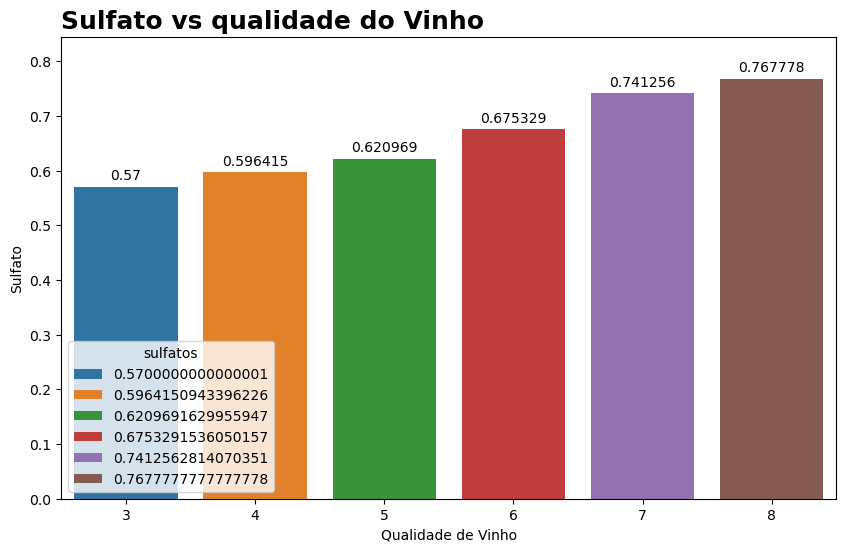

In [9]:
# Gráfico de barra Sulfato / Qualidade do Vinho 0.25 de correlação
grafo_barra(media_sulfato_qualidade, media_sulfato_qualidade.index, media_sulfato_qualidade['sulfatos'], media_sulfato_qualidade['sulfatos'],titulo='Sulfato vs qualidade do Vinho', ylabel='Sulfato', xlabel='Qualidade de Vinho')

#### relação entre ácido cítrico e qualidade do vinho

In [10]:
# Média de Ácido Cítrico / qualidade
media_citrico_qualidade = pd.DataFrame(df.groupby('qualidade')['acido_citrico'].mean())
media_citrico_qualidade

,acido_citrico
qualidade,
3,0.171000
4,0.174151
5,0.243686
6,0.273824
7,0.375176
8,0.391111


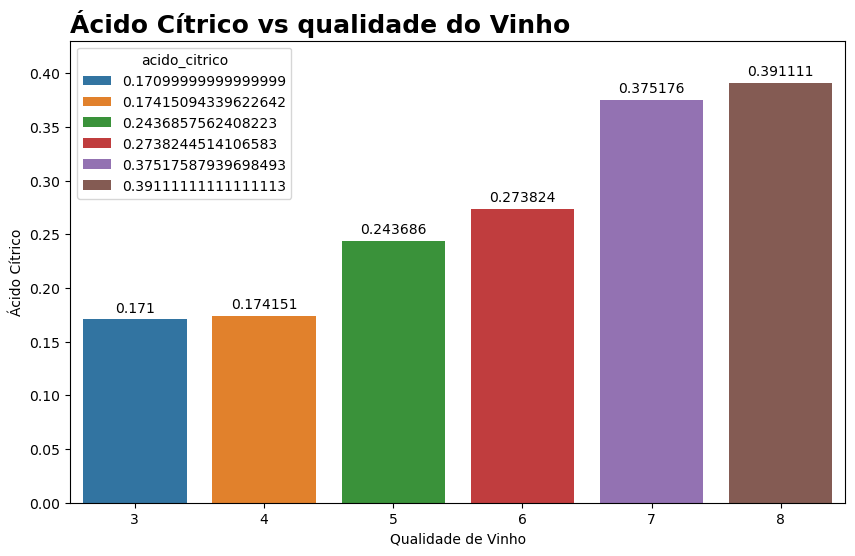

In [11]:
# Gráfico de barra Sulfato / Qualidade do Vinho 0.25 de correlação
grafo_barra(media_citrico_qualidade, media_citrico_qualidade.index, media_citrico_qualidade['acido_citrico'], media_citrico_qualidade['acido_citrico'],titulo='Ácido Cítrico vs qualidade do Vinho', ylabel='Ácido Cítrico', xlabel='Qualidade de Vinho')

#### Como os gráfico das médias do seulfatos e ácido cítrico vs qualidade nos mostra que também são diretamente proporcionais a qualidade do vinho.
#### Vamos observar a relações entres algumas váriáveis para que possamos dar continuidade e escolhermos qual tipo de modelo nos ajudará, nas previsões de qualidades para nossos futuros vinhos.

#### Relação entre acidez volátil e teor alcóolico

# **Classificação Geral de Correlação de Pearson:**  
**Valor da Correlação(r)**----**Intensidade**-----------**Direção**  
-0,70 a -1,00--------------------Forte----------------Negativa    
-0,39 a -0,69---------------Moderada a fraca----------Negativa    
-0,20 a -0,38--------------------Fraca----------------Negativa    
-0,19 a +0,19---------------Praticamente nula----------Neutra    

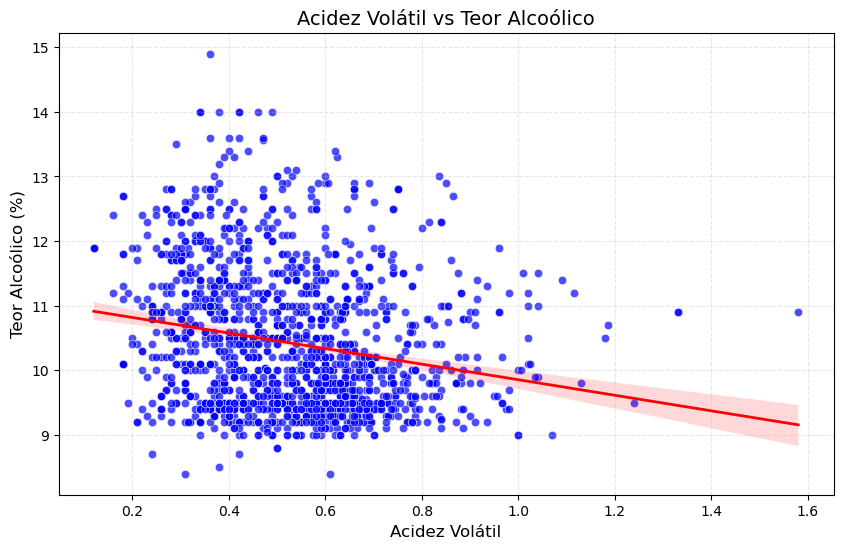

In [ ]:
# Relação entre acidez volátil e teor alcóolico
grafo_scatterplot(df, df['acidez_volatil'], df['alcool'], titulo='Acidez Volátil vs Teor Alcoólico', xlabel='Acidez Volátil', ylabel='Teor Alcoólico (%)')

In [ ]:
# Teste correlação de Pearson
corr_alcool_acidez_volatil = df[['alcool', 'acidez_volatil']].corr('pearson', numeric_only=True)
corr_alcool_acidez_volatil

,alcool,acidez_volatil
alcool,1.000000,-0.202288
acidez_volatil,-0.202288,1.000000


#### Relação entre acidez volátil e qualidade do vinho

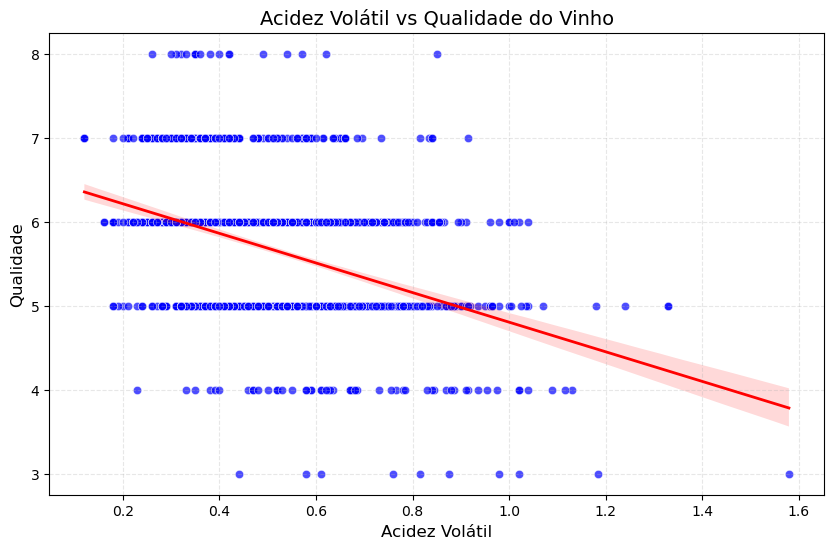

In [4]:
# Relação entre acidez volátil e teor qualidade do vinho
grafo_scatterplot(df, df['acidez_volatil'], df['qualidade'], titulo='Acidez Volátil vs Qualidade do Vinho', xlabel='Acidez Volátil', ylabel='Qualidade')

In [29]:
# Teste correlação de Pearson
corr_acidez_volatil_qualidade = df[['acidez_volatil', 'qualidade']].corr('pearson', numeric_only=True)
corr_acidez_volatil_qualidade

,acidez_volatil,qualidade
acidez_volatil,1.000000,-0.390558
qualidade,-0.390558,1.000000


#### Relação entre alcool e qualidade do vinho

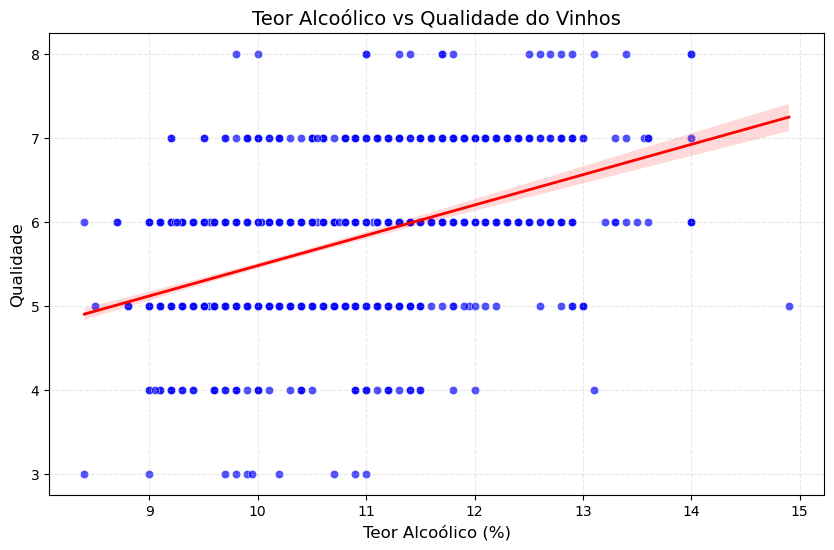

In [ ]:
# Relação entre teor alcóolico vs qualidade do vinho
grafo_scatterplot(df, df['alcool'], df['qualidade'], titulo='Teor Alcoólico vs Qualidade do Vinho', xlabel='Teor Alcoólico (%)', ylabel='Qualidade')

In [30]:
# Teste correlação de Pearson
corr_alcool_acidez_qualidade = df[['alcool', 'qualidade']].corr('pearson', numeric_only=True)
corr_alcool_acidez_qualidade

,alcool,qualidade
alcool,1.000000,0.476166
qualidade,0.476166,1.000000


#### Relação entre sulfatos e qualidade do vinho

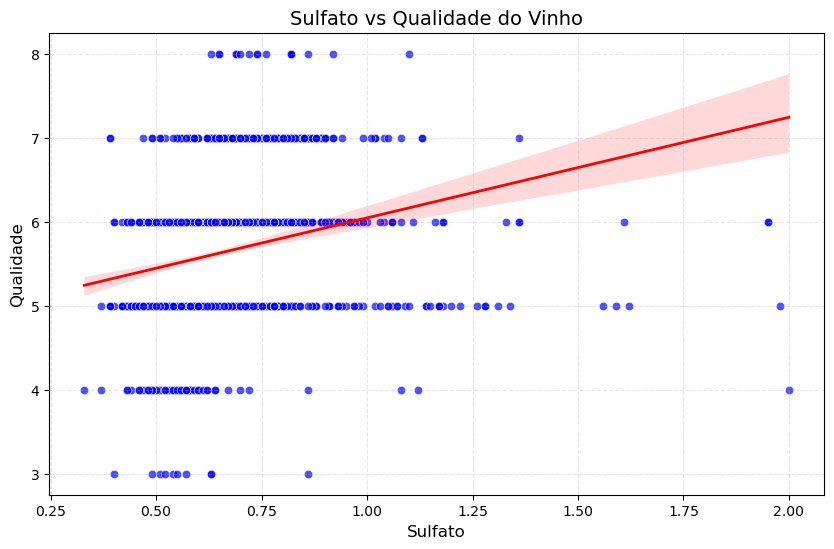

In [ ]:
# Relação entre sulfato vs qualidade do vinho
grafo_scatterplot(df, df['sulfatos'], df['qualidade'], titulo='Sulfato vs Qualidade do Vinho', xlabel='Sulfato', ylabel='Qualidade')

In [31]:
# Teste correlação de Pearson
corr_sulfatos_qualidade = df[['sulfatos', 'qualidade']].corr('pearson', numeric_only=True)
corr_sulfatos_qualidade

,sulfatos,qualidade
sulfatos,1.000000,0.251397
qualidade,0.251397,1.000000


#### Relação entre ácido cítrico e qualidade do vinho

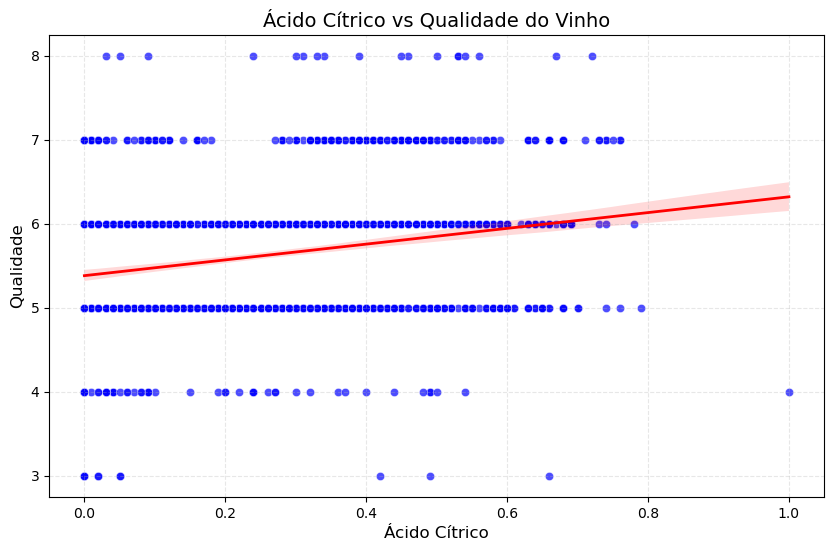

In [21]:
# Relação entre ácido cítrico vs qualidade do vinho
grafo_scatterplot(df, df['acido_citrico'], df['qualidade'], titulo='Ácido Cítrico vs Qualidade do Vinho', xlabel='Ácido Cítrico', ylabel='Qualidade')

In [32]:
# Teste correlação de Pearson
corr_acido_citrico_qualidade = df[['acido_citrico', 'qualidade']].corr('pearson', numeric_only=True)
corr_acido_citrico_qualidade

,acido_citrico,qualidade
acido_citrico,1.000000,0.226373
qualidade,0.226373,1.000000


#### A correlação mais alta que encontramos entre as variáveis independentes com a variável resposta, no caso que utilizarei como resposta é a varaiável alcool com 0.49 positiva de correlação pearson entrando na intensidad Moderada a fraca como deixei na tabela acima 

Conclusão:

A correlação não implica que **mais álcool** = **melhor qualidade**, apenas que há uma tendência nos dados analisados.

- Embora exista uma relação moderada (r = 0,48) entre teor alcoólico e qualidade, isso não significa que aumentar o álcool melhora o vinho automaticamente. 

- Recomenda-se analisar outras variáveis (como tipo de uva, região climática ou técnicas de vinificação) para entender completamente os drivers de qualidade.

- Iniciarei a criação dos algortimos com as **co-variáveis** originais do dataset e caso não consiga alcançar predições com valores satisfatórios de retorno para alcançarmos a qualidade necessária para criação de vinho. Então irei buscar **co-variáveis** externas para alcançar os objetivos.

In [4]:
def teste(nome, idade, cidade):
    print(f'{nome} tem {idade} anos e mora em {cidade}')

dados = {'nome': 'Jackson', 'idade': 41, 'cidade':'Guarulhos'}

teste(**dados)

Jackson tem 41 anos e mora em Guarulhos
